<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/demo_ntlk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시소러스(유의어 사전)을 통한 컴퓨터의 단어의 의미 (간접적) 이해


### B.1 NLTK 설치

In [2]:
!pip list | grep nltk

nltk                          3.2.5


### B.2 WordNet에서 동의어 얻기: lemma_names()메서드

In [4]:
from nltk.corpus import wordnet

wordnet.synsets('car')      # 동의어 그룹 얻기 실행 결과, 5개의 동의어그룹 확인
                            # 예: car.n.01 의 의미는 동의어그룹중 car라는 명사의 첫번째임.


[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [5]:
car = wordnet.synset('car.n.01')    # 동의어그룹 car.n.01를 가져옴
print("type: ", type(car))
car.definition()  

type:  <class 'nltk.corpus.reader.wordnet.Synset'>


'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [6]:
car.lemma_names()                   # car의 동의어(부명제) 들

['car', 'auto', 'automobile', 'machine', 'motorcar']

### B.3 WordNet과 단어 네트워크 (단어의 의미적 계층적관계): hypernym_paths()

In [7]:
car.hypernym_paths()[0]            # hypernym: 상의어 

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('container.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

In [8]:
car.hypernym_paths()[1]            # 또 다른 상.하 관계

[Synset('entity.n.01'),
 Synset('physical_entity.n.01'),
 Synset('object.n.01'),
 Synset('whole.n.02'),
 Synset('artifact.n.01'),
 Synset('instrumentality.n.03'),
 Synset('conveyance.n.03'),
 Synset('vehicle.n.01'),
 Synset('wheeled_vehicle.n.01'),
 Synset('self-propelled_vehicle.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('car.n.01')]

### B.4 WordNet을 사용한 의미 유사도: path_similarity(), 0 ~ 1 실수 (유사도) 반환

In [46]:
from collections import OrderedDict
import pandas as pd
import seaborn as sns
o_dic = OrderedDict()

In [32]:
car = wordnet.synset('car.n.01')
novel = wordnet.synset('novel.n.01')
dog = wordnet.synset('dog.n.01')
motorcycle = wordnet.synset('motorcycle.n.01')

In [49]:
o_dic['novel'] = car.path_similarity(novel)
o_dic['novel']

0.05555555555555555

In [50]:
o_dic['dog'] = car.path_similarity(dog)
o_dic['dog']

0.07692307692307693

In [51]:
o_dic['motorcycle'] = car.path_similarity(motorcycle)
o_dic['motorcycle']


0.3333333333333333

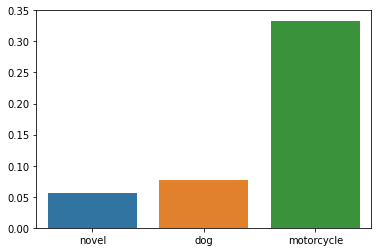

In [64]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)

##### ■ 단어 네트워크를 이용한 car와의 유사도 평가: motorcycle > dog > novel

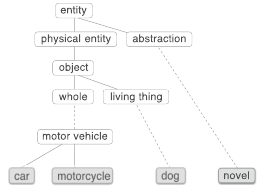


### 참고1. Leacock-Chodorow (LCH) 유사도

In [65]:
o_dic['novel'] = car.lch_similarity(novel)
o_dic['novel']

0.7472144018302211

In [66]:
o_dic['dog'] = car.lch_similarity(dog)
o_dic['dog']

1.072636802264849

In [67]:
o_dic['motorcycle'] = car.lch_similarity(motorcycle)
o_dic['motorcycle']

2.538973871058276

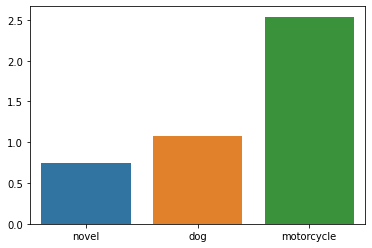

In [68]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)

### 참고2. Wu-Palmer 유사도

In [69]:
o_dic['novel'] = car.wup_similarity(novel)
o_dic['novel']

0.10526315789473684

In [70]:
o_dic['dog'] = car.wup_similarity(dog)
o_dic['dog']

0.4

In [73]:
o_dic['motorcycle'] = car.wup_similarity(motorcycle)
o_dic['motorcycle']

0.9166666666666666

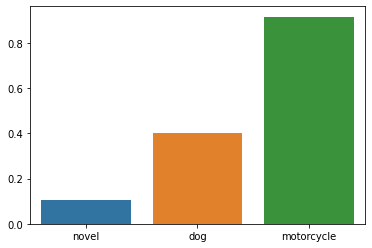

In [75]:
df = pd.DataFrame(data=o_dic, index=[0])
sns.barplot(data=df)